# Linear Regression

Check for Tensorflow installation

In [ ]:
try:
    import tensorflow as tf
    print("TensorFlow is installed. Version:", tf.__version__)
except ImportError:
    print("TensorFlow is not installed. Installing Now.....")
    !pip install tensorflow

TensorFlow is installed. Version: 2.15.0


Cleaning & Preprocessing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1_boston_housing.csv',na_values='NA')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [ ]:
for i in df.columns:
    mean_value = df[i].mean()
    df[i].fillna(mean_value, inplace=True)

Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[:, df.columns != 'MEDV']
Y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

Data Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
9/9 [==============================] - 3s 66ms/step - loss: 550.3097 - mae: 21.6063 - val_loss: 619.3676 - val_mae: 22.8007
Epoch 2/100
9/9 [==============================] - 0s 15ms/step - loss: 509.2187 - mae: 20.5939 - val_loss: 568.1512 - val_mae: 21.6170
Epoch 3/100
9/9 [==============================] - 0s 16ms/step - loss: 453.9373 - mae: 19.1725 - val_loss: 496.9821 - val_mae: 19.8401
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 378.2978 - mae: 17.0437 - val_loss: 401.2600 - val_mae: 17.1287
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 283.7092 - mae: 14.0141 - val_loss: 290.5880 - val_mae: 13.6122
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 193.7621 - mae: 10.9559 - val_loss: 193.4030 - val_mae: 10.0406
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 135.3643 - mae: 8.9471 - val_loss: 145.5513 - val_mae: 8.6669
Epoch 8/100
9/9 [==============================] - 

Testing & Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
mse, mae = model.evaluate(X_test, Y_test)

predicted_vals = model.predict(X_test)
r_squared = r2_score(Y_test, predicted_vals)

7/7 [==============================] - 0s 6ms/step


In [ ]:
print('Mean squared error on test data: ', mse)
print('Mean absolute error on test data: ', mae)
print('R squared error on test data: ', r_squared)

Mean squared error on test data:  20.839555740356445
Mean absolute error on test data:  3.060154438018799
R squared error on test data:  0.7550814808392564


# Classify Fashion Clothing

Check for Tensorflow installation

In [ ]:
try:
    import tensorflow as tf
    print("TensorFlow is installed. Version:", tf.__version__)
except ImportError:
    print("TensorFlow is not installed. Installing Now.....")
    !pip install tensorflow

TensorFlow is installed. Version: 2.15.0


Import Libraries and Load Fashion MNIST Dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [ ]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Define and Build the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

Compile and Train the Model

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 61s 40ms/step - loss: 1.4160 - accuracy: 0.8441 - val_loss: 0.3406 - val_accuracy: 0.8809
Epoch 2/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2889 - accuracy: 0.8971 - val_loss: 0.3402 - val_accuracy: 0.8832
Epoch 3/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2475 - accuracy: 0.9102 - val_loss: 0.3228 - val_accuracy: 0.8888
Epoch 4/5
1500/1500 [==============================] - 58s 38ms/step - loss: 0.2307 - accuracy: 0.9150 - val_loss: 0.3289 - val_accuracy: 0.8892
Epoch 5/5
1500/1500 [==============================] - 59s 39ms/step - loss: 0.2075 - accuracy: 0.9225 - val_loss: 0.3490 - val_accuracy: 0.8843


Evaluate the Model

In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("Loss Score : {} \nAccuracy : {}".format(loss, acc))

313/313 [==============================] - 3s 8ms/step - loss: 0.3704 - accuracy: 0.8870
Loss Score : 0.37043628096580505 
Accuracy : 0.8870000243186951


Make Predictions and Visualize Results

In [ ]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']
print(test_x)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
inputs = test_x[:1]
predictions = model.predict(inputs)
label = labels[np.argmax(predictions)]

1/1 [==============================] - 0s 68ms/step


In [ ]:
import matplotlib.pyplot as plt

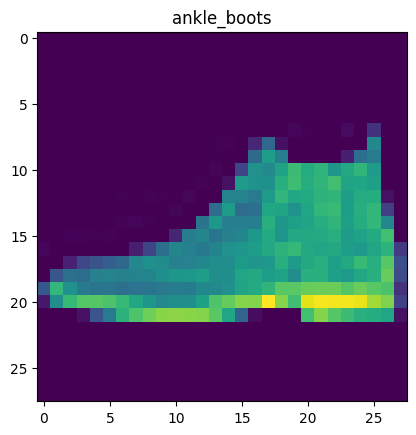

In [ ]:
plt.title(label)
plt.imshow(test_x[:1][0])
plt.show()

# Time Series Analysis

Check for Tensorflow installation

In [ ]:
try:
    import tensorflow as tf
    print("TensorFlow is installed. Version:", tf.__version__)
except ImportError:
    print("TensorFlow is not installed. Installing Now.....")
    !pip install tensorflow

TensorFlow is installed. Version: 2.15.0


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
tf.config.run_functions_eagerly(True)

Data Preparation

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/goolge.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

Splitting Dataset

In [ ]:
train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

Data Sequencing

In [ ]:
def create_sequences(data, time_steps=6):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, 0])
        y.append(data[i+time_steps, 0])
    return np.array(X), np.array(y)

In [ ]:
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

Model Training

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=4)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 2s 124ms/step - loss: 0.1606
Epoch 2/50
11/11 [==============================] - 1s 130ms/step - loss: 0.0429
Epoch 3/50
11/11 [==============================] - 1s 82ms/step - loss: 0.0291
Epoch 4/50
11/11 [==============================] - 1s 80ms/step - loss: 0.0301
Epoch 5/50
11/11 [==============================] - 1s 86ms/step - loss: 0.0253
Epoch 6/50
11/11 [==============================] - 1s 87ms/step - loss: 0.0233
Epoch 7/50
11/11 [==============================] - 1s 81ms/step - loss: 0.0238
Epoch 8/50
11/11 [==============================] - 1s 79ms/step - loss: 0.0229
Epoch 9/50
11/11 [==============================] - 1s 76ms/step - loss: 0.0232
Epoch 10/50
11/11 [==============================] - 1s 79ms/step - loss: 0.0237
Epoch 11/50
11/11 [==============================] - 1s 86ms/step - loss: 0.0232
Epoch 12/50
11/11 [==============================] - 1s 86ms/step - loss: 0.0246
Epoch 13/50
11/11 [===========================

Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 [==============================] - 0s 56ms/step


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  14.110735148995527
MSE:  202.67421597279483
RMSE:  14.236369480060386


Prediction

In [ ]:
last_6_days = data['Close'][-6:].values
last_6_days_scaled = scaler.transform(last_6_days.reshape(-1, 1))
X_pred = []
X_pred.append(last_6_days_scaled)
X_pred = np.array(X_pred)
X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))

In [ ]:
pred_price = model.predict(X_pred)
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for the next day: ', pred_price)

1/1 [==============================] - 0s 53ms/step
Predicted price for the next day:  [[835.51056]]


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


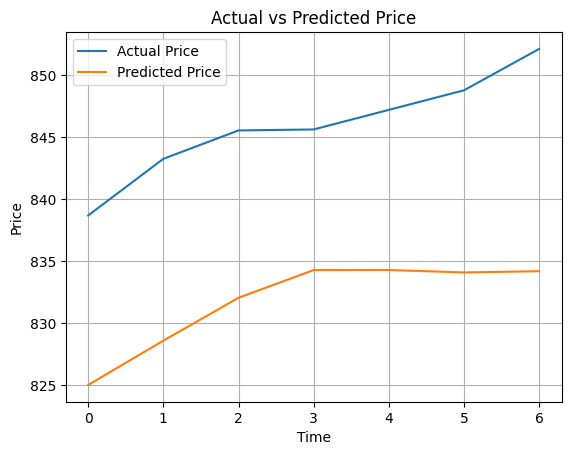

In [ ]:
import matplotlib.pyplot as plt

# Plotting the original test data
plt.plot(y_test, label='Actual Price')

# Plotting the predicted prices
plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()